In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('../../dados/instagram/instagram_comments.csv')

In [9]:
df_grouped = df.groupby('id_do_usuario').count()[['id_comment']]\
                                        .reset_index()\
                                        .rename(columns = {'id_comment': 'comentarios'})
stats_df = df_grouped.groupby('comentarios').count()\
                                            .reset_index()\
                                            .rename(columns = {'id_do_usuario': 'frequencia'})
stats_df['pdf'] = stats_df['frequencia'] / sum(stats_df['frequencia'])
stats_df['cdf'] = stats_df['pdf'].cumsum()

In [10]:
stats_df

,comentarios,frequencia,pdf,cdf
0,1,79235,0.717604,0.717604
1,2,15570,0.141012,0.858617
2,3,5609,0.050799,0.909415
3,4,2794,0.025304,0.934720
4,5,1559,0.014119,0.948839
...,...,...,...,...
214,547,1,0.000009,0.999964
215,629,1,0.000009,0.999973
216,730,1,0.000009,0.999982
217,1506,1,0.000009,0.999991


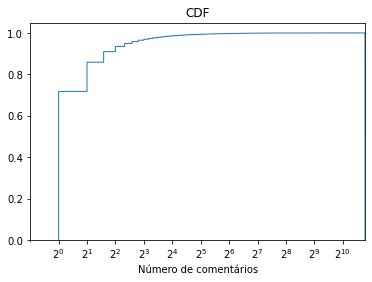

In [16]:
plt.hist(df_grouped['comentarios'], bins=df_grouped['comentarios'].max()+1, 
         density=True, cumulative=True, histtype='step')
plt.xlim(0, df_grouped['comentarios'].max())
plt.xscale('symlog', basex=2)
plt.xticks([2**i for i in range(0,11)])
plt.xlabel('Número de comentários')
plt.title('CDF')
plt.show()

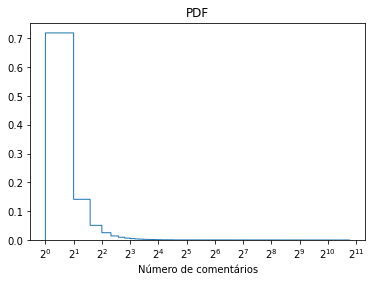

In [15]:
plt.hist(df_grouped['comentarios'], bins=df_grouped['comentarios'].max()+1, density=True, histtype='step')
plt.xscale('symlog', basex=2)
plt.xticks([2**i for i in range(0,12)])
plt.xlabel('Número de comentários')
plt.title('PDF')
plt.show()